<a href="https://colab.research.google.com/github/AbhinavMangalore16/SpamSlayer-SpamClassifier/blob/main/SpamSlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SpamSlayer:**
## *Developing an Accurate Spam Classification Model Using Machine Learning*

Welcome to this project on spam classification!

The main goal of this project is to develop an algorithm that can accurately distinguish between spam and non-spam emails.

Spam emails are a common problem that many people face on a daily basis. They can contain harmful links, phishing scams, and other fraudulent content that can compromise the security and privacy of the recipient. Spam can also be a significant drain on productivity, as users must spend valuable time sifting through their inboxes to identify and delete unwanted messages.

In this project, we will be using machine learning algorithms to build a spam classification model. We will be working with a dataset of emails, with each email labeled as spam or non-spam. We will use this dataset to train and optimize our model, and then evaluate its performance on a separate test dataset.

By developing an accurate spam classification model, we can help to reduce the risk of security breaches, improve productivity, and enhance the overall user experience. So, let's get started with this project and build a model that can accurately identify and filter out spam emails.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('spam.csv',encoding = 'latin-1')

In [ ]:
df.head() #first 5 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape #dimensions of dataset

(5572, 5)

## 1. Data Cleaning

Source:

*Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. (2011). Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Applied Computing (SAC '11). TaiChung, Taiwan.*




The SMS Spam Collection is a dataset of SMS messages that has been collected from free or free for research sources on the internet. The dataset contains a total of 5,574 messages, including 4,827 legitimate (ham) messages and 747 spam messages.

The dataset was collected from a variety of sources, including public forums where users reported receiving SMS spam messages, as well as a dataset of legitimate SMS messages collected for research purposes. The messages largely originate from Singaporeans and mostly from students attending the National University of Singapore.

Each message in the dataset is labeled as either spam or ham, and the dataset consists of a single text file where each line contains the correct class followed by the raw message. The dataset has been used in several academic research projects on mobile spam filtering.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# No need of the last three columns
df = df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
# renaming columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()
df['target'] = labelen.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum() 

target    0
text      0
dtype: int64

In [ ]:
# No missing values
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

## 2. Exploratory Data Analysis

##### Spams and hams:

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

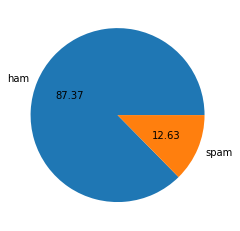

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [ ]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [ ]:
df['num_chars'] = df['text'].apply(len) #Number of characters 

In [ ]:
df

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df

,target,text,num_chars,words,sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df.describe()

,target,num_chars,words,sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [ ]:
df[df['target'] == 0].describe() #Summary description of ham

,target,num_chars,words,sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [ ]:
df[df['target'] == 1].describe()

,target,num_chars,words,sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


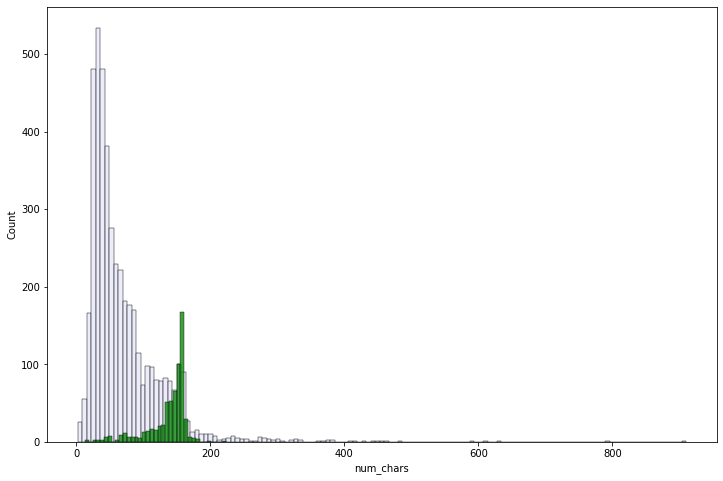

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_chars'], color = 'lavender')
sns.histplot(df[df['target'] == 1]['num_chars'], color = 'green')

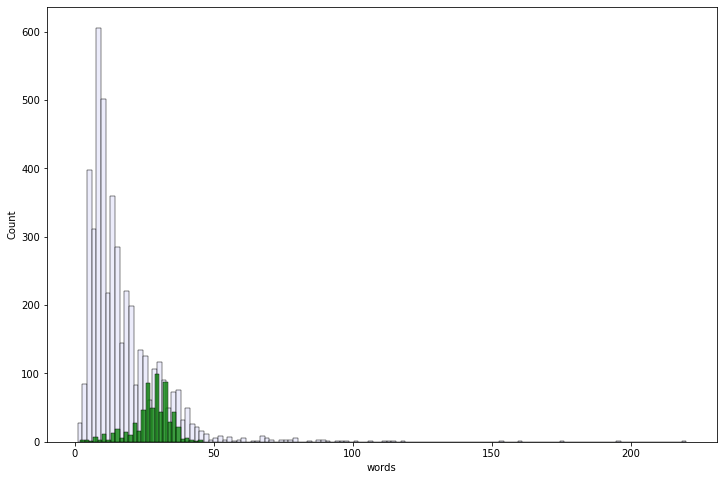

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['words'], color = 'lavender')
sns.histplot(df[df['target'] == 1]['words'], color = 'green')

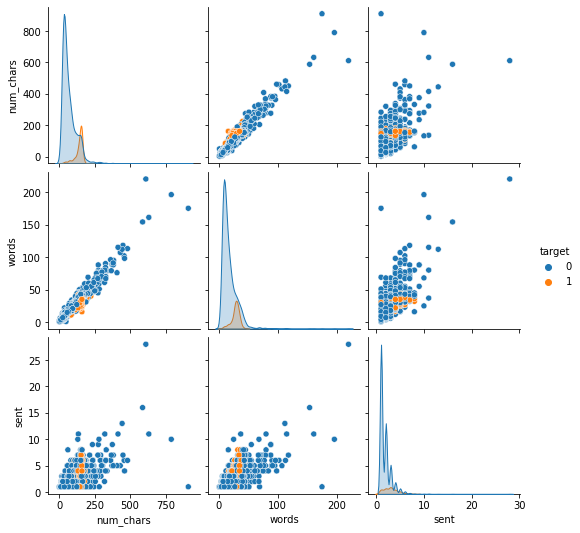

In [ ]:
sns.pairplot(df,hue='target')

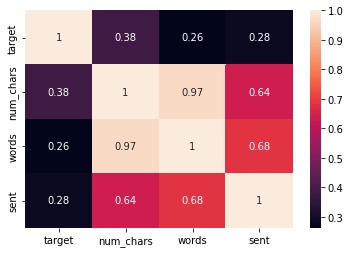

In [ ]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

The following function will preprocess text data. It takes a raw text input, such as a message or document, and converts it into a format that can be easily analyzed by a machine learning model.

The function performs the following steps:

1)It converts all characters in the text to lowercase.

2)It splits the text into individual words or tokens.

3)It removes any special characters and punctuation marks from the text.

4)It removes any stop words, which are common words that do not provide much useful information.

5)It returns the cleaned text as a single string.

The purpose of text preprocessing is to make the text data more meaningful and easier to analyze for a machine learning model.

In [ ]:
def transform_txt(text):
    text = text.lower() #lowercasing
    text = nltk.word_tokenize(text) #tokenization
    lis = []
    for i in text:
        if i.isalnum():
            lis.append(i) #special characters removal
    text = lis[:]
    lis.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            lis.append(i)
    return " ".join(lis)

In [ ]:
transform_txt("Hello ho are you abhi!")

'hello ho abhi'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_txt)

### WordCloud:
A word cloud is a graphical representation of text data where the size of each word is proportional to its frequency in the text. In other words, the more frequently a word appears in the text, the larger it appears in the word cloud.

Word clouds are often used to visually represent the most common words or themes in a given text. They can be created using various software tools, including Python libraries such as WordCloud and Matplotlib.

Word clouds can be useful in exploring and analyzing text data, as they provide a quick and intuitive summary of the most frequently occurring words. They can also be used to identify patterns, trends, or topics within a larger text corpus.

In the context of spam classification, a word cloud can be used to visualize the most frequent words or phrases in spam messages. By creating a word cloud of the text in spam messages, we can identify common words or patterns that are indicative of spam content.

For example, a word cloud might reveal that the most frequent words in spam messages are "free", "buy", "click", "offer", and "discount". This could suggest that these words are commonly used in spam messages to entice users to click on links or purchase products.

On the other hand, a word cloud of legitimate messages (ham) might show that the most frequent words are "meeting", "tomorrow", "schedule", "reminder", and "office". This could suggest that these words are commonly used in professional or personal communication.

By comparing the word clouds of spam and ham messages, we can identify key differences and develop strategies for classifying new messages as either spam or ham. For example, we might develop a rule-based approach that assigns a high probability of spam to messages containing frequent spam-related words, or we might use machine learning algorithms to automatically identify patterns in the text data.

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

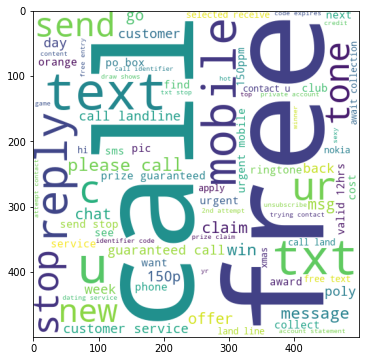

In [ ]:
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

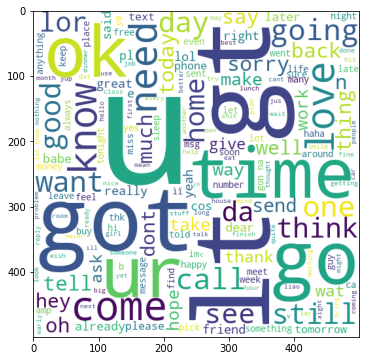

In [ ]:
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

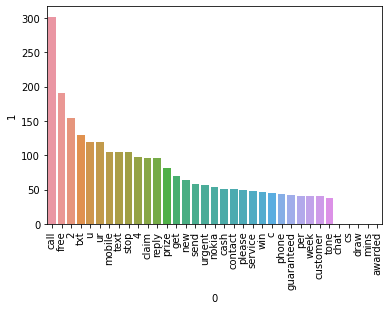

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(35))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

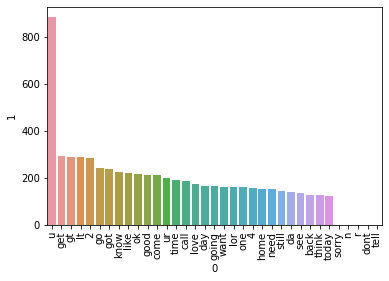

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(35))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

## 4. ML Model Algorithms

### [Count vectorization]

The CountVectorizer object takes a list of text documents as input, and tokenizes each document into individual words or terms. It then constructs a vocabulary of all the unique words or terms that appear in the document collection, and counts the number of times each word appears in each document.

The output of CountVectorizer is a sparse matrix, where each row represents a document and each column represents a unique word in the vocabulary. The value in each cell is the count of how many times the corresponding word appears in the corresponding document.

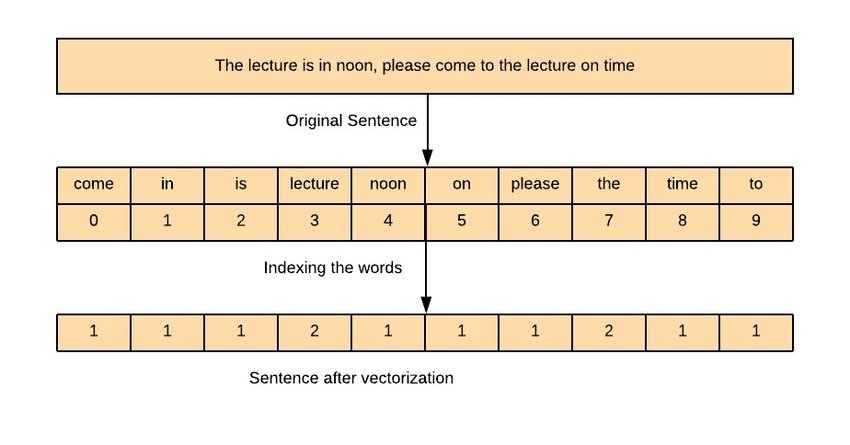

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 8002)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, classification_report
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Confusion Matrix:

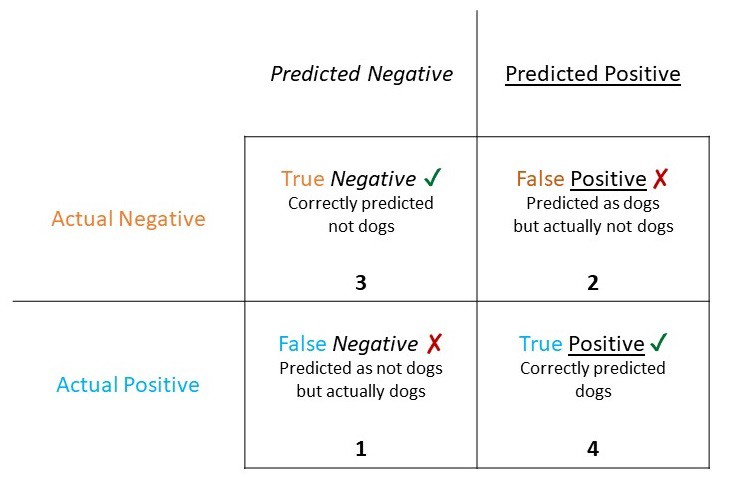

A confusion matrix is a tool used in machine learning to evaluate the performance of a classification model. It is a table that summarizes the predictions made by a model on a set of test data, comparing them to the true labels of the data.

The confusion matrix is typically used for binary classification problems (i.e., where there are only two classes, such as spam or not spam). It has four entries: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

True positives (TP) are the number of instances that were correctly classified as positive (i.e., spam messages correctly identified as spam). True negatives (TN) are the number of instances that were correctly classified as negative (i.e., legitimate messages correctly identified as not spam). False positives (FP) are the number of instances that were incorrectly classified as positive (i.e., legitimate messages incorrectly identified as spam). False negatives (FN) are the number of instances that were incorrectly classified as negative (i.e., spam messages incorrectly identified as legitimate). The confusion matrix is useful because it provides a more detailed understanding of the performance of a model than just using a single metric, such as accuracy. For example, if the goal of a spam filter is to reduce false positives (i.e., the number of legitimate emails that are incorrectly classified as spam), then the number in the "FP" cell of the confusion matrix is a key metric to monitor. Alternatively, if the goal is to reduce false negatives (i.e., the number of spam emails that are incorrectly classified as legitimate), then the number in the "FN" cell is a key metric.

In a project, the confusion matrix can help you understand the strengths and weaknesses of your classification model. By examining the matrix, you can identify patterns in the types of errors that the model is making, which can inform the tuning of hyperparameters or the selection of new features to improve performance. The confusion matrix can also help you communicate the performance of your model to stakeholders, such as managers or clients, in a clear and concise manner.


In [ ]:
def confusion_mat(Y_test,pred_test_DT): #Confusion matrix printing function
    group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
    test_cnf_matrix = confusion_matrix(Y_test,pred_test_DT)
    test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
    test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
    test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
    test_labels = np.asarray(test_labels).reshape(2,2)
    plt.figure(figsize = (16,5))
    sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues')

### ROC and AUC:
ROC and AUC under the ROC:

AUC stands for "area under the curve" and ROC stands for "receiver operating characteristic." The AUC-ROC curve is a graphical representation of the performance of a binary classification model at different classification thresholds. The ROC curve plots the true positive rate (TPR) on the y-axis and the false positive rate (FPR) on the x-axis for different threshold values. A random classifier has an AUC of 0.5 and a perfect classifier has an AUC of 1.0.

The AUC-ROC curve is useful for evaluating the performance of a binary classification model because it shows the trade-off between the TPR and FPR at different classification thresholds. A good classifier will have a higher TPR and a lower FPR, resulting in a curve that hugs the top-left corner of the plot. On the other hand, a poor classifier will have a lower TPR and a higher FPR, resulting in a curve that is closer to the diagonal line.

In a project, you can use AUC-ROC to compare the performance of different binary classification models or to tune the hyperparameters of your model to achieve the best performance. You can also use AUC-ROC to communicate the performance of your model to stakeholders or to make decisions about whether to deploy the model in a production environment.

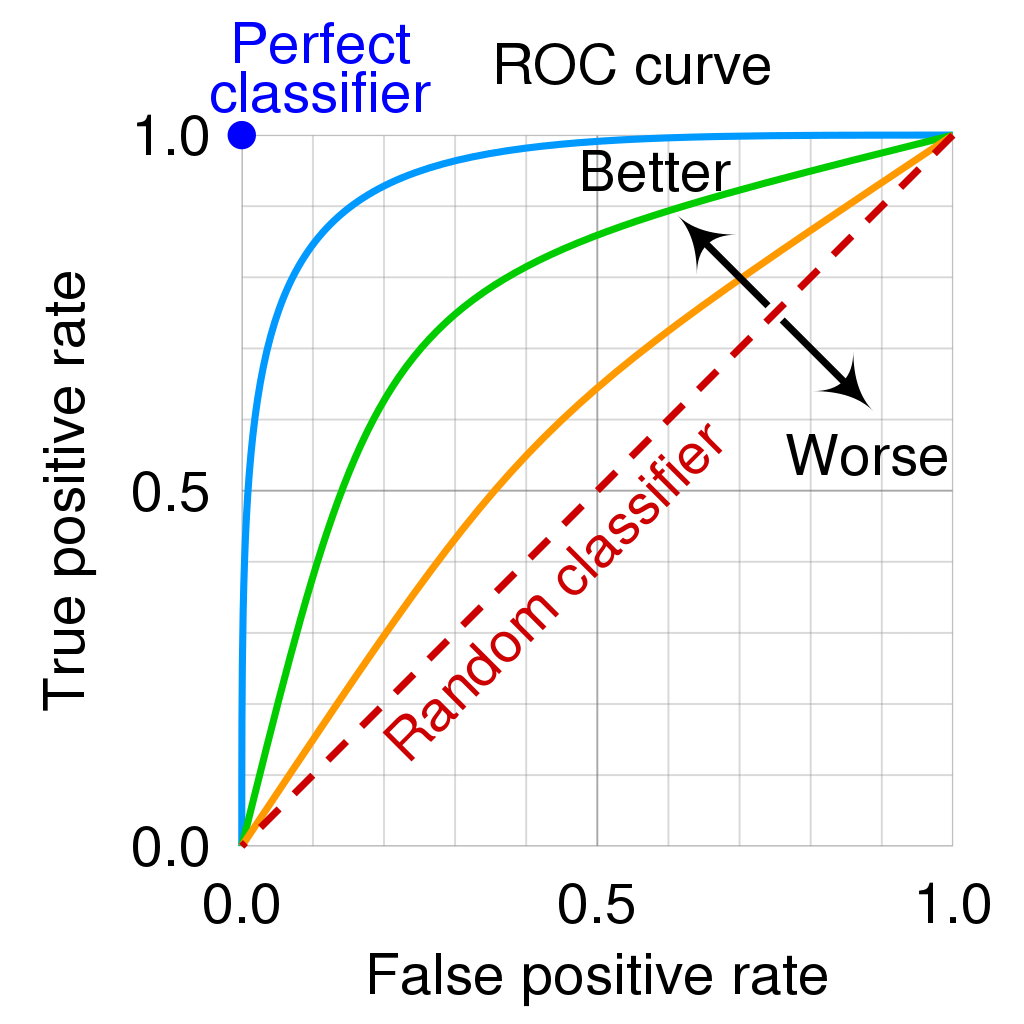

In [ ]:
def roc_auc(y_test,y_pred, model):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

*Some general points on our spam filtering problem:*

Since I am considering personal mails here, I would prioritize precision over recall, i.e. to minimize false positives, i.e. I don't want any important mails to be missed. In this case, we will likely prefer to have fewer false positives, even if it means some spam messages may be missed (false negatives). A high precision score indicates that the messages identified as spam are likely to be truly spam.

### 1. Naïve Bayes Approach

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gunb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### Gaussian NB Approach:

In [ ]:
gunb.fit(X_train,y_train)
y_pred1 = gunb.predict(X_test)

Accuracy Score: 0.8858800773694391
Precision Score:  0.5594713656387665


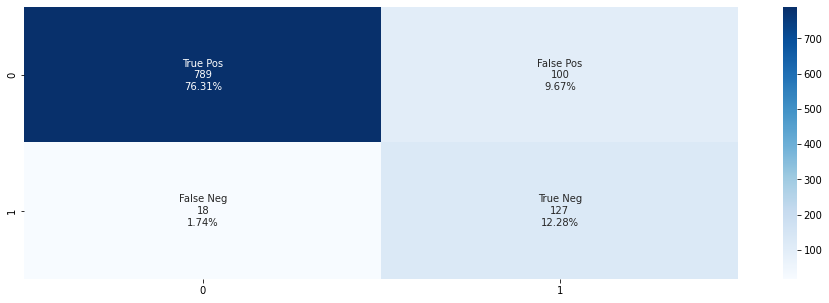

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred1))
print("Precision Score: ", precision_score(y_test,y_pred1))
confusion_mat(y_test, y_pred1)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       889
           1       0.56      0.88      0.68       145

    accuracy                           0.89      1034
   macro avg       0.77      0.88      0.81      1034
weighted avg       0.92      0.89      0.90      1034



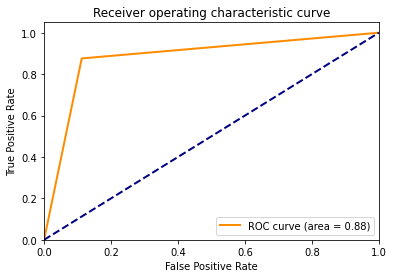

In [ ]:
roc_auc(y_test,y_pred1,gunb)

Multinomial NB Approach:
Multinomial Naive Bayes: This algorithm is commonly used for discrete data, such as word frequency counts. It assumes that the features are represented as counts of discrete events, and that the counts follow a multinomial distribution. In SMS spam classification, the features might be the frequency of occurrence of certain words in the SMS messages. The Multinomial Naive Bayes algorithm calculates the probabilities of each word occurring in each class (spam or non-spam) and uses those to model the probability of a new SMS message belonging to each class. 

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
y_pred2

array([1, 0, 0, ..., 1, 0, 0])

Accuracy Score: 0.9738878143133463
Precision Score:  0.8881578947368421


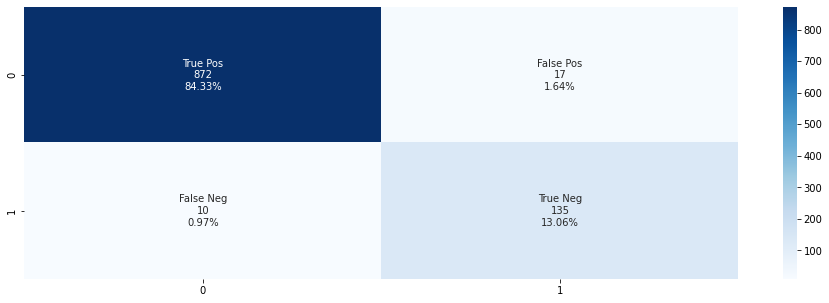

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred2))
print("Precision Score: ", precision_score(y_test,y_pred2))
confusion_mat(y_test, y_pred2)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.93      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.97      0.97      0.97      1034



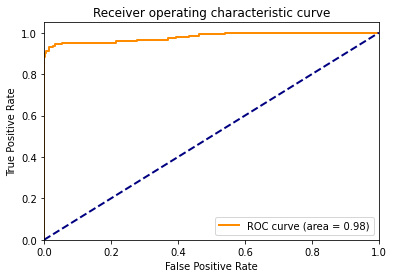

In [ ]:
roc_auc(y_test,y_pred2,mnb)

### Bernoulli NB Approach:
Bernoulli Naive Bayes: This algorithm is also used for discrete data, but it assumes that the features are binary (i.e., present or absent). In other words, it assumes that each feature is represented as a Boolean variable that indicates whether the feature is present or not. In SMS spam classification, the features might be the presence or absence of certain words in the SMS messages. The Bernoulli Naive Bayes algorithm calculates the probabilities of each word occurring or not occurring in each class (spam or non-spam) and uses those to model the probability of a new SMS message belonging to each class.

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
y_pred3

array([0, 1, 0, ..., 1, 0, 0])

Accuracy Score: 0.9642166344294004
Precision Score:  0.9736842105263158


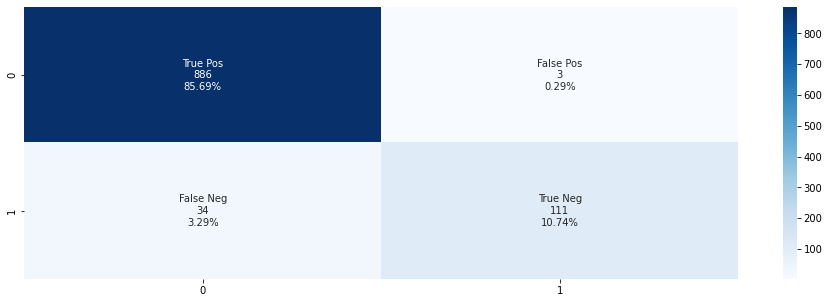

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred3))
print("Precision Score: ", precision_score(y_test,y_pred3))
confusion_mat(y_test, y_pred3)

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.77      0.86       145

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034



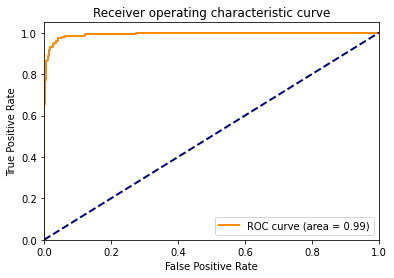

In [ ]:
roc_auc(y_test,y_pred3,bnb)

### 2. Logistic Regression:

Logistic regression is a type of linear classifier that models the probability of an input belonging to a particular class. In the case of spam classification, logistic regression can be trained on a labeled dataset of spam and ham messages to learn a decision boundary that separates the two classes based on patterns in the text data. Given a new message, the logistic regression model can then predict the probability that the message is spam or ham based on its input features.

In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
y_pred4 = lrc.predict(X_test)
y_pred4

array([0, 0, 0, ..., 1, 0, 0])

Accuracy Score: 0.9709864603481625
Precision Score:  0.9259259259259259


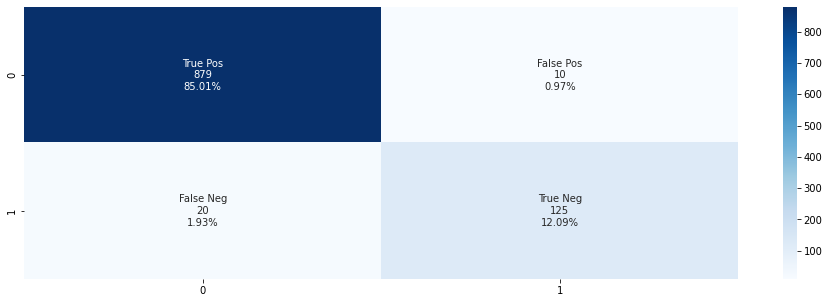

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred4))
print("Precision Score: ", precision_score(y_test,y_pred4))
confusion_mat(y_test, y_pred4)

In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       889
           1       0.93      0.86      0.89       145

    accuracy                           0.97      1034
   macro avg       0.95      0.93      0.94      1034
weighted avg       0.97      0.97      0.97      1034



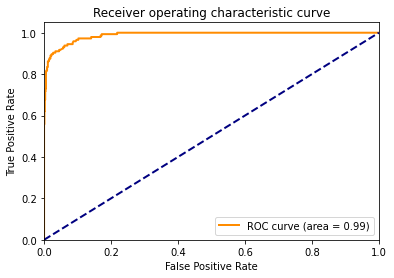

In [ ]:
roc_auc(y_test,y_pred4,lrc)

### 3. k-Nearest Neighbors

K-nearest neighbors (KNN) is a type of instance-based learning algorithm that classifies new inputs based on their similarity to existing labeled examples. In the context of spam classification, KNN can be trained on a labeled dataset of spam and ham messages and then used to classify new messages based on their similarity to the examples in the dataset. Given a new message, the KNN algorithm finds the K most similar examples in the training dataset and then assigns the new message to the class that is most common among its K nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred5 = knn.predict(X_test)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score: 0.9052224371373307
Precision Score:  1.0


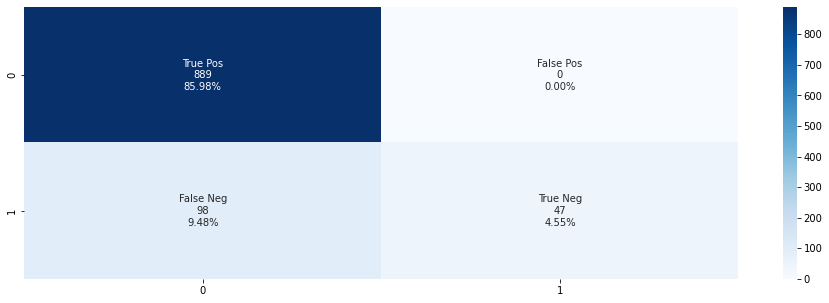

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred5))
print("Precision Score: ", precision_score(y_test,y_pred5))
confusion_mat(y_test, y_pred5)

In [ ]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       889
           1       1.00      0.32      0.49       145

    accuracy                           0.91      1034
   macro avg       0.95      0.66      0.72      1034
weighted avg       0.91      0.91      0.88      1034



In [ ]:
roc_auc(y_test,y_pred5,knn)

### 4. Decision Tree Classifier:

Decision tree classifiers are a type of non-linear classifier that learn a hierarchical structure of decision rules from the training data. In the context of spam classification, a decision tree classifier can be trained on a labeled dataset of spam and ham messages to learn a decision tree that separates the two classes based on patterns in the text data. Given a new message, the decision tree classifier follows the decision rules in the tree to assign the message to the appropriate class.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# from sklearn import tree
# fig = plt.figure(figsize=(30,25))
# _ = tree.plot_tree(dtc,filled=True)
y_pred6 = dtc.predict(X_test)
y_pred6

array([0, 0, 0, ..., 1, 0, 0])

Accuracy Score: 0.9506769825918762
Precision Score:  0.8455882352941176


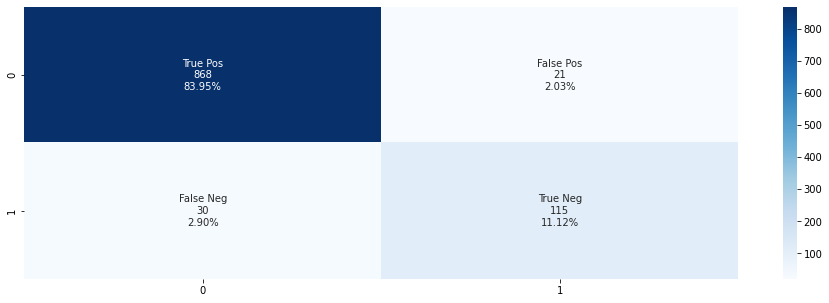

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred6))
print("Precision Score: ", precision_score(y_test,y_pred6))
confusion_mat(y_test, y_pred6)


In [ ]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       889
           1       0.85      0.79      0.82       145

    accuracy                           0.95      1034
   macro avg       0.91      0.88      0.89      1034
weighted avg       0.95      0.95      0.95      1034



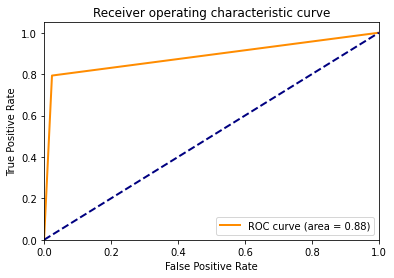

In [ ]:
roc_auc(y_test,y_pred6,dtc)

### 5. Support Vector Machine - Sigmoid kernel

Sigmoid kernel Support Vector Machines (SVM) can be used for spam classification, which is the task of determining whether an email is spam or not based on its content.
SVMs are a type of binary classifier that work by finding a hyperplane that separates the data into two classes. In the case of spam classification, the SVM is trained on a set of labeled examples of spam and non-spam emails. The SVM tries to find a hyperplane that separates these two classes, so that when a new email is presented to the model, it can predict whether it is spam or not based on which side of the hyperplane it falls on.

The sigmoid kernel is a type of kernel function that can be used to transform the input data into a higher-dimensional space, making it easier for the SVM to find a hyperplane that separates the data. 
The sigmoid kernel function has the form:
k(x, y) = tanh(αx^T y + c)

where x and y are two data points, α is a scaling factor, and c is a constant offset. The sigmoid function is a non-linear function that maps the input data into a higher-dimensional space.

To train a sigmoid kernel SVM for spam classification, we first need to preprocess the email data by converting it into a numerical format. This can be done by using techniques such as bag-of-words or TF-IDF. Once the data is in a numerical format, we can train the SVM on a labeled dataset, using the sigmoid kernel to transform the data into a higher-dimensional space.
During the training process, the SVM tries to find the hyperplane that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the closest data points from each class. The SVM tries to find the hyperplane that has the maximum margin, which will result in a more robust classifier that is less likely to overfit the training data.

Once the SVM is trained, we can use it to classify new emails as either spam or not spam. To do this, we preprocess the new email using the same technique that we used to preprocess the training data, and then apply the trained SVM to the preprocessed data. The SVM will output a score between 0 and 1, which represents the confidence that the email is spam. We can then set a threshold to determine whether an email is classified as spam or not, based on this score.


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid',gamma=1.0, probability=True)
svc.fit(X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid', probability=True)

In [ ]:
y_pred_svm_7 = svc.predict(X_test)
y_pred_svm_7

array([0, 0, 0, ..., 1, 0, 0])

Accuracy Score: 0.9245647969052224
Precision Score:  0.7310344827586207


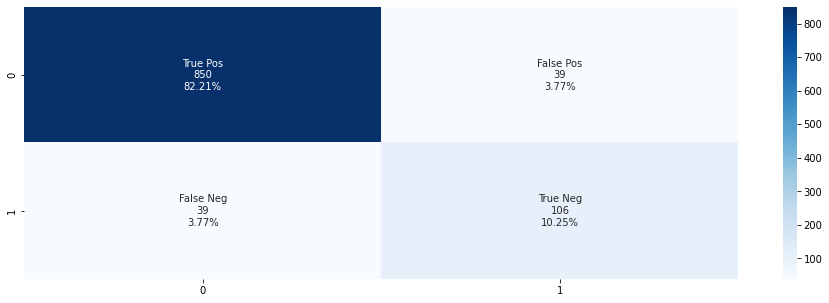

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred_svm_7))
print("Precision Score: ", precision_score(y_test,y_pred_svm_7))
confusion_mat(y_test, y_pred_svm_7)

In [ ]:
print(classification_report(y_test, y_pred_svm_7))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       889
           1       0.73      0.73      0.73       145

    accuracy                           0.92      1034
   macro avg       0.84      0.84      0.84      1034
weighted avg       0.92      0.92      0.92      1034



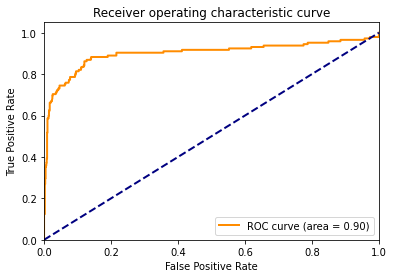

In [ ]:
roc_auc(y_test,y_pred_svm_7,svc)

## 5. Optimization of the models and fine-tuning

### 5.1 TF-IDF Word Vectorization

I am now going to change the text vectorization method by using: TF-IDF vectorizer
TF-IDF (Term Frequency-Inverse Document Frequency) is a popular technique used for text vectorization in Natural Language Processing (NLP) applications. It is often used to represent text data in a numerical format that can be used as input to machine learning models, such as in spam classification or sentiment analysis.

In a typical NLP project, we start with a corpus of documents (e.g., a set of emails or customer reviews) and we want to extract relevant information from these documents. TF-IDF is a text vectorization technique that is used to transform each document in the corpus into a vector of numerical values, which represent the importance of each word in the document.

TF-IDF works by computing two values for each word in a document: the term frequency (TF) and the inverse document frequency (IDF). The term frequency represents how often the word appears in the document, while the inverse document frequency represents how important the word is to the entire corpus. 

The TF-IDF value is computed as the product of these two values.
The TF-IDF vectorization process involves the following steps:

->Tokenization: The first step is to split each document into a set of tokens or words. This can be done using various techniques such as whitespace tokenization, or more advanced techniques such as N-gram tokenization.

->Calculation of term frequency: The next step is to calculate the term frequency (TF) of each word in the document. The term frequency of a word is simply the number of times it appears in the document.

->Calculation of inverse document frequency: The inverse document frequency (IDF) of a word is calculated as the logarithm of the ratio of the total number of documents in the corpus to the number of documents that contain the word. This helps to give more weight to rare words that are more informative.

->Calculation of TF-IDF values: The final step is to compute the TF-IDF value for each word in the document by multiplying the term frequency by the inverse document frequency.
The resulting TF-IDF vectors can be used as input to machine learning models, such as SVM or Naive Bayes classifiers, for various NLP tasks such as text classification, sentiment analysis or topic modeling.

In summary, TF-IDF vectorization is a technique that converts text data into a numerical format that can be used as input to machine learning models. It involves computing the term frequency and inverse document frequency for each word in a document and then combining these values to generate a vector of numerical values that represents the importance of each word in the document. This technique is widely used in NLP applications to process large amounts of text data and extract relevant information from them.


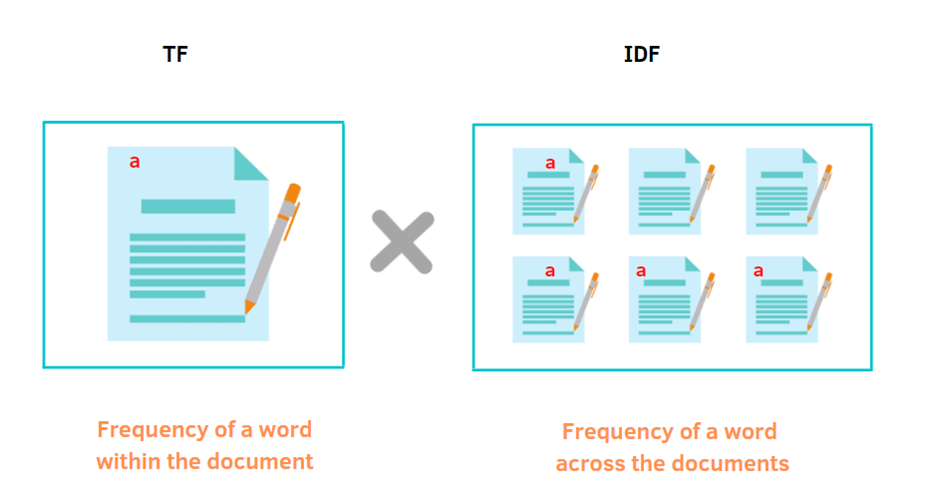

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

### 5.2 Analysis of ML Algorithms with new vectorization

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
lr = LogisticRegression(solver = 'liblinear', penalty='l1')
svm = SVC(kernel='sigmoid', gamma = 0.2,probability=True)
mbnn = MultinomialNB()
bnbn = BernoulliNB()
knnn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=7)


In [ ]:
classifiers = {
    'Sigmoid SVC' : svm,
    'KN' : knnn, 
    'MNB': mbnn, 
    'BNB': bnbn, 
    'LR': lr
}

In [ ]:
def train_classifier(clsf,X_train,y_train,X_test,y_test):
    clsf.fit(X_train,y_train)
    y_pred = clsf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred) 
    print("\n ->first 30 predictions:",y_pred[:30],"\n")
    return accuracy,precision

In [ ]:
accuracies = []
precisions = []
i = 0

print("Testing set(first 30):",y_test[:30])

for name,clf in classifiers.items():
    i+=1
    curr_acc,curr_prec = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("Model No.",i,": ",name)
    print("Accuracy - ",curr_acc)
    print("Precision - ",curr_prec)
    
    accuracies.append(curr_acc)
    precisions.append(curr_prec)
    print("\n\n")


Testing set(first 30): [0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]

 ->first 30 predictions: [0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 

Model No. 1 :  Sigmoid SVC
Accuracy -  0.9709864603481625
Precision -  0.9389312977099237




 ->first 30 predictions: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

Model No. 2 :  KN
Accuracy -  0.9052224371373307
Precision -  1.0




 ->first 30 predictions: [1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0] 

Model No. 3 :  MNB
Accuracy -  0.9738878143133463
Precision -  0.8881578947368421




 ->first 30 predictions: [0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 

Model No. 4 :  BNB
Accuracy -  0.9642166344294004
Precision -  0.9736842105263158




 ->first 30 predictions: [0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 

Model No. 5 :  LR
Accuracy -  0.9709864603481625
Precision -  0.9259259259259259





### 5.3 Ensemble Learning:
**What is ensemble learning, and why we may need it?**

Ensemble learning is used in machine learning because it can improve the accuracy and robustness of predictive models. Ensemble methods combine multiple models (called base or weak learners) to create a more powerful model that can generalize better to new, unseen data.
There are several reasons why ensemble learning is effective. One reason is that it reduces the risk of overfitting, which occurs when a model is too complex and fits the training data too closely, resulting in poor performance on new data. By combining multiple models, ensemble methods can reduce the variance in the predictions and achieve better generalization performance.
Ensemble learning can also capture a wider range of patterns in the data than a single model can. Different models may be more effective at capturing different aspects of the data, and by combining them, the ensemble can make use of their complementary strengths.
Finally, ensemble methods are often more robust to noise and outliers in the data. Individual models may be affected by these issues, but the ensemble can smooth out the noise and improve the overall performance.
Overall, ensemble learning is a powerful technique for improving the accuracy and robustness of predictive models, and it is widely used in machine learning applications.


Ensemble classifiers:
RandomForestClassifier: RandomForestClassifier is an ensemble learning method that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It combines multiple decision trees to reduce overfitting and increase the model's accuracy. It works by constructing a set of decision trees based on random subsets of the training data and random subsets of the features.

AdaBoostClassifier: AdaBoostClassifier is a boosting algorithm that combines multiple weak learners to create a strong classifier. It works by assigning weights to each data point in the training set and adjusting the weights of misclassified points in each iteration to focus on the harder-to-classify examples. It then combines the outputs of all weak classifiers to create a final prediction.

BaggingClassifier: BaggingClassifier is an ensemble learning method that involves constructing multiple models (e.g., decision trees) trained on bootstrap samples of the training set. It reduces the variance of the model by averaging the predictions of multiple trees, thereby improving the model's accuracy. BaggingClassifier is particularly useful for high-variance models that are prone to overfitting.

ExtraTreesClassifier: ExtraTreesClassifier is another ensemble learning method similar to RandomForestClassifier that builds multiple decision trees using random subsets of the features and training data. The difference is that ExtraTreesClassifier selects the split points randomly, rather than finding the best split point using information gain or Gini impurity. This makes it faster than other decision tree-based algorithms and more resistant to overfitting.

GradientBoostingClassifier: GradientBoostingClassifier is a boosting algorithm that builds an additive model in a forward stage-wise fashion. It trains a sequence of weak learners (typically decision trees) and combines them to create a strong classifier. It works by iteratively adding decision trees to the model, with each tree fitted on the residuals of the previous trees. This approach enables it to improve on the weaknesses of previous models and achieve better accuracy.

XGBClassifier: XGBClassifier is an optimized implementation of gradient boosting that is designed to be highly efficient and scalable. It uses a more regularized model formalization to control over-fitting and also supports parallel processing, making it a popular choice for large-scale machine learning applications.

In summary, these classifiers are all ensemble learning methods that combine multiple models to achieve better accuracy than a single model could achieve. They differ in their specific approaches and characteristics, but all are widely used in machine learning applications due to their ability to improve model performance and reduce overfitting.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
#n_estimators has been set to 100 for all classifiers, which will increase the number of trees in the ensembles and potentially improve their performance.

abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
#max_depth has been set to 10, which will limit the depth of the trees and reduce the risk of overfitting.

bc = BaggingClassifier(n_estimators=100, max_samples=0.5, max_features=0.5, random_state=42)
#max_samples and max_features have been set to 0.5, which will randomly select half of the training samples and features for each base estimator.
etc = ExtraTreesClassifier(n_estimators=100, max_depth=15, min_samples_split=5, random_state=42)
#max_depth has been set to 15 and min_samples_split has been set to 5, 
#which will increase the depth of the trees and improve their ability to capture complex patterns in the data.

gbdt = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
#max_depth has been set to 3 and learning_rate has been set to 0.1, which will control the complexity of the model and the contribution of each weak learner.

xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.5, colsample_bytree=0.5, random_state=42)
#max_depth has been set to 5, subsample has been set to 0.5, 
#and colsample_bytree has been set to 0.5, which will control the complexity of the model and the randomness of the feature and sample selection
clfs_ensem = {
    'RF': rfc, 
    'AdaBoost': abc, 
    'BagClf': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
accuracies = []
precisions = []
i = 0

print("Testing set(first 30):",y_test[:30])

for name,clf in clfs_ensem.items():
    i+=1
    curr_acc,curr_prec = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("Model No.",i,": ",name)
    print("Accuracy - ",curr_acc)
    print("Precision - ",curr_prec)
    
    accuracies.append(curr_acc)
    precisions.append(curr_prec)
    print("\n\n")

Testing set(first 30): [0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]

 ->first 30 predictions: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

Model No. 1 :  RF
Accuracy -  0.8839458413926499
Precision -  1.0




 ->first 30 predictions: [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 

Model No. 2 :  AdaBoost
Accuracy -  0.9410058027079303
Precision -  0.9117647058823529




 ->first 30 predictions: [0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 

Model No. 3 :  BagClf
Accuracy -  0.9680851063829787
Precision -  0.9912280701754386




 ->first 30 predictions: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

Model No. 4 :  ETC
Accuracy -  0.8945841392649904
Precision -  1.0




 ->first 30 predictions: [0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 

Model No. 5 :  GBDT
Accuracy -  0.9535783365570599
Precision -  0.907563025210084




 ->first 30 predictions: [0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 

In [ ]:
ens = pd.DataFrame({'Ensemble Algorithm':clfs_ensem.keys(),'Accuracy':accuracies,'Precision':precisions}).sort_values('Precision',ascending=False)

5.4 Voting and Stacking Ensembling Techniques
add Codeadd Markdown
Voting and stacking are two popular ensemble learning methods that combine multiple machine learning models to improve predictive performance. Both methods have their own strengths and weaknesses, and the choice between them will depend on the specific problem and data set you are working with.

Voting

In voting, multiple models are trained on the same data set and their predictions are combined using a majority vote. There are two main types of voting: hard voting and soft voting.
*Hard voting: In hard voting, the predictions of the models are combined using a majority vote. For example, if three models predict "1", "0", and "1", respectively, then the ensemble prediction will be "1" because it has the most votes.
Soft voting: In soft voting, the models' predictions are combined by averaging their predicted probabilities. The ensemble prediction is then the class with the highest average probability. Soft voting can be more effective than hard voting because it takes into account the confidence of the models' predictions.*
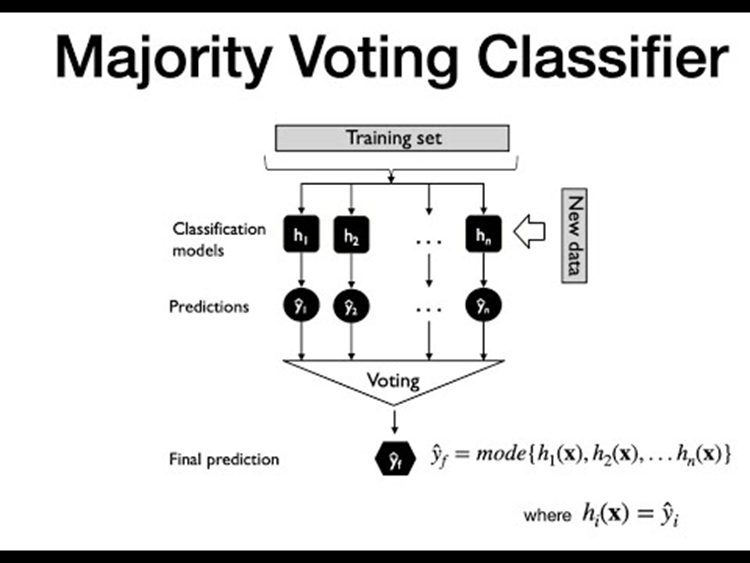


Stacking

In stacking, multiple models are trained and their predictions are used as inputs to a meta-model that makes the final prediction. The idea behind stacking is that different models may be good at capturing different aspects of the data, and by combining them in a meta-model, the ensemble can make use of their complementary strengths.
The stacking process involves two stages:
Training stage: Multiple models are trained on the training data set, and their predictions are stored.
Meta-model stage: The predictions of the base models are used as inputs to a meta-model, which is trained on the same data set. The meta-model can be a simple linear model, a decision tree, or another machine learning model.*
Stacking can be more effective than voting because it can capture more complex interactions between the models and the data. However, stacking is more computationally expensive than voting and may require more data to train the meta-model effectively

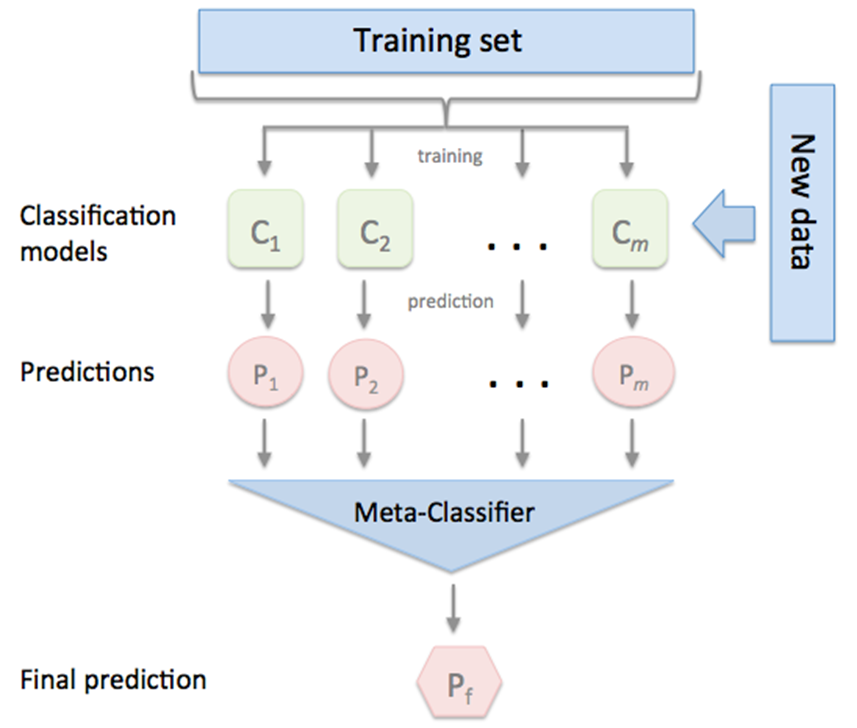


In [ ]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svm), ('nb', bnb), ('et', etc), ('adabst',abc),('lr',lr)],voting='soft')
voting.fit(X_train,y_train)
y_pred_vt = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred_vt))
print("Precision",precision_score(y_test,y_pred_vt))

# Applying stacking
# from sklearn.ensemble import StackingClassifier
# estimators=[('svm', svm), ('nb', bnb), ('et', etc), ('adabst',abc),('lr',lr)]
# final_estimator=RandomForestClassifier()
# stk = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
# stk.fit(X_train,y_train)
# y_pred_stk = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred_stk))
# print("Precision",precision_score(y_test,y_pred_stk))


Accuracy 0.9729206963249516
Precision 0.9834710743801653


## 6. Serializing the model using pickle

As we know, the python pickle module handles way to serialize(i.e., convert and save the object to a binary format) and deserialize (i.e., convert back to its original format) Python objects. Specifically, the trained TF-IDF vectorizer and the voting classifier model will be saved.
Once these objects are saved to disk, they can be loaded and used to make predictions on new data without having to retrain the models. This can be useful when you need to make predictions in a production environment, where you want to minimize the time and resources needed to process new data.


In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(voting,open('spam_filter.pkl','wb'))